In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("belize_airbnb_listings.csv")
df.head(1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.0,5,225


In [151]:
#min=0.01 an dmax=5.92
#len(df["reviews_per_month"])
#print(5.92/2796)
bin_size = len(df['number_of_reviews'])

In [152]:
#Rice's rule to find bin size - Rice’s rule is defined as: (cube root of the number of observations) * 2.
def cube_root(x):
    return x**(1/3)
my_bin = print(cube_root(bin_size)*2)

28.17576510491762


1. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
How do you choose your bin size?

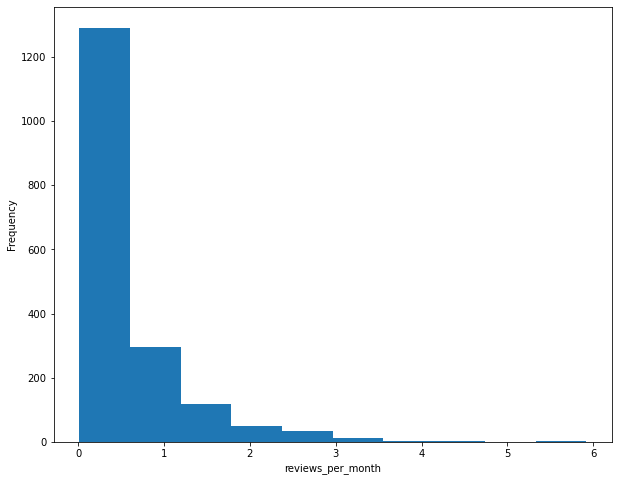

In [154]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=df["reviews_per_month"], bins = my_bin)
plt.xlabel("reviews_per_month")
plt.ylabel("Frequency")
plt.show()

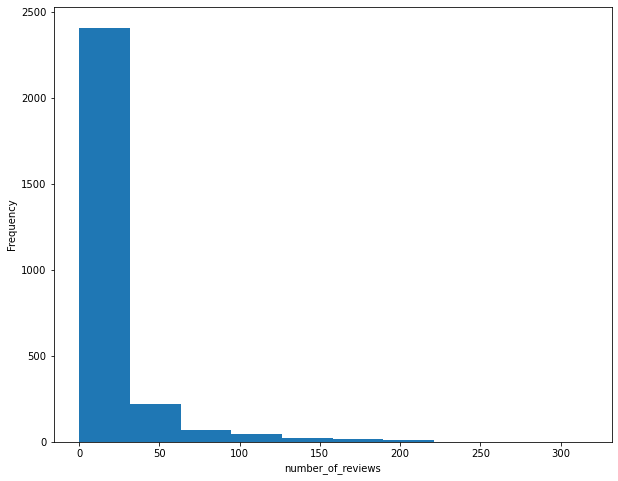

In [155]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=df["number_of_reviews"], bins = my_bin)
plt.xlabel("number_of_reviews")
# we don't need a y value in a histgram because its a measure of frequency.
plt.ylabel("Frequency")
plt.show()

2. Create a box and whisker plot for availability_365. What does this show you?

Text(0.5, 1.0, 'Frequency for availability_365')

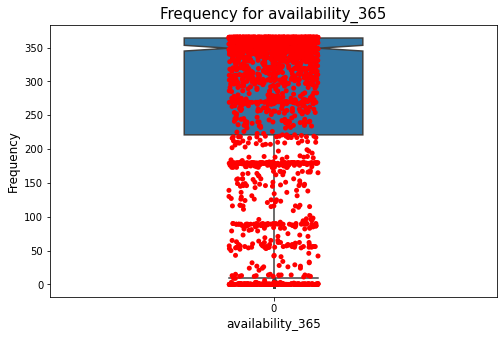

In [67]:
#df["availability_365"]
import seaborn as sns
sns.boxplot(data=df['availability_365'], notch=True, width=0.4)
#stripplot - adds datapoints to the plot
sns.stripplot(data=df['availability_365'], color='red')
plt.rcParams['figure.figsize'] = (10,8)
plt.xlabel("availability_365", fontsize= 12)
plt.ylabel("Frequency", fontsize= 12)
plt.title("Frequency for availability_365", fontsize= 15)

In [ ]:
Median is skewed, as more datapoints are around 350. 



3. What is the probability that the price for an Airbnb is under $50.
What do you notice about these records? Hint: look at the other columns.
What distribution does this data most closely fit?

In [224]:
val= (df[df['price']<50])
price_50 = val['price'].count()
price_total = df['price'].count()
prob_price_50 = price_50/price_total
prob_price_50

0.017525035765379112

(array([ 3.,  6., 14.,  0.,  6., 13.,  7.]),
 array([20., 24., 28., 32., 36., 40., 44., 48.]),
 <BarContainer object of 7 artists>)

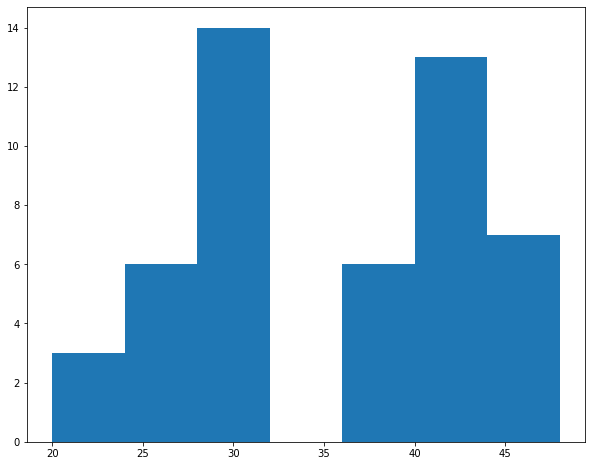

In [225]:
plt.hist(val['price'], bins='auto')
#It is observed that no records exsists for price between 32-36

4. Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
Why sample variance and not population variance?
What is your takeaway for each metric?
What are the scales of measurement for each of these values?

Population variance consumes time, resources, budget or may be computationally difficult to perform. So, usually we compute 
analysis for a sample where cardinality is set to (n-1) i.e., the denominator is set to n-1 in sample variance and n i population variance
Calculating with denominator n-1 makes the analysis unbiased and it is the reason we see some slight difference in sample and population variance. 
variance is measured in squared. standard deviation units are not squared. 
#Latitude and longitude - both are ordinal, as order of these fields is associated with their location in general
#availability_365, minimum_nights cannot be zero so, its a ratio
#nuber_of_reviews and reviews_per_month are ordinal

In [132]:
import math
import statistics
from scipy import stats
df.agg({'price': ['var', 'std'],
       'latitude': ['var', 'std'],
       'longitude': ['var', 'std'],
       'minimum_nights': ['var', 'std'],
       'number_of_reviews': ['var', 'std'],
       'reviews_per_month': ['var', 'std'],
       'calculated_host_listings_count': ['var', 'std'],
       'availability_365': ['var', 'std']})
#statistics.pvariance(df['availability_365'])

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,317109.568066,0.288841,0.147361,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,563.124825,0.537440,0.383876,5.669843,30.327768,0.662154,51.711183,120.617632


In [136]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.0,5,225


5. What percent of Airbnb listings in Belize are available 360 days a year or more?
360 days or less?
What distribution does this data most closely fit?

In [228]:
total_360 = df['availability_365'].count()
grt_360 = df[df['availability_365']>=360]
grt_360_perc = grt_360['availability_365']>=360
percgrt_360 = grt_360['availability_365'].count()/total_360 *100
percgrt_360


39.52074391988555

In [229]:
total_360 = df['availability_365'].count()
less_360 = df[df['availability_365']<=360]
less_360_perc = less_360['availability_365']<=360
percless_360 = less_360['availability_365'].count()/total_360 *100
percless_360

61.55221745350501

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

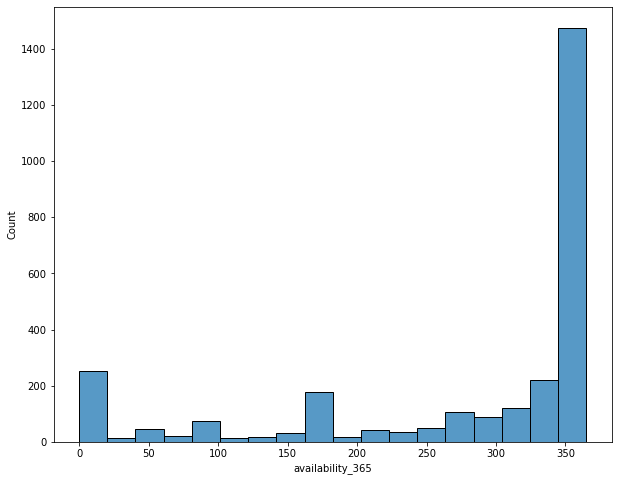

In [230]:
sns.histplot(x = 'availability_365', data=df, bins='auto')

6. What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [3]:
df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64